In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Random forests without diabetes

In [25]:
from util.functions import impute_and_train

df_without_diabetes = pd.read_csv('processed/df_without_diabetes.csv')

results = impute_and_train(df_without_diabetes, RandomForestClassifier)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5


/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 1/5


/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5


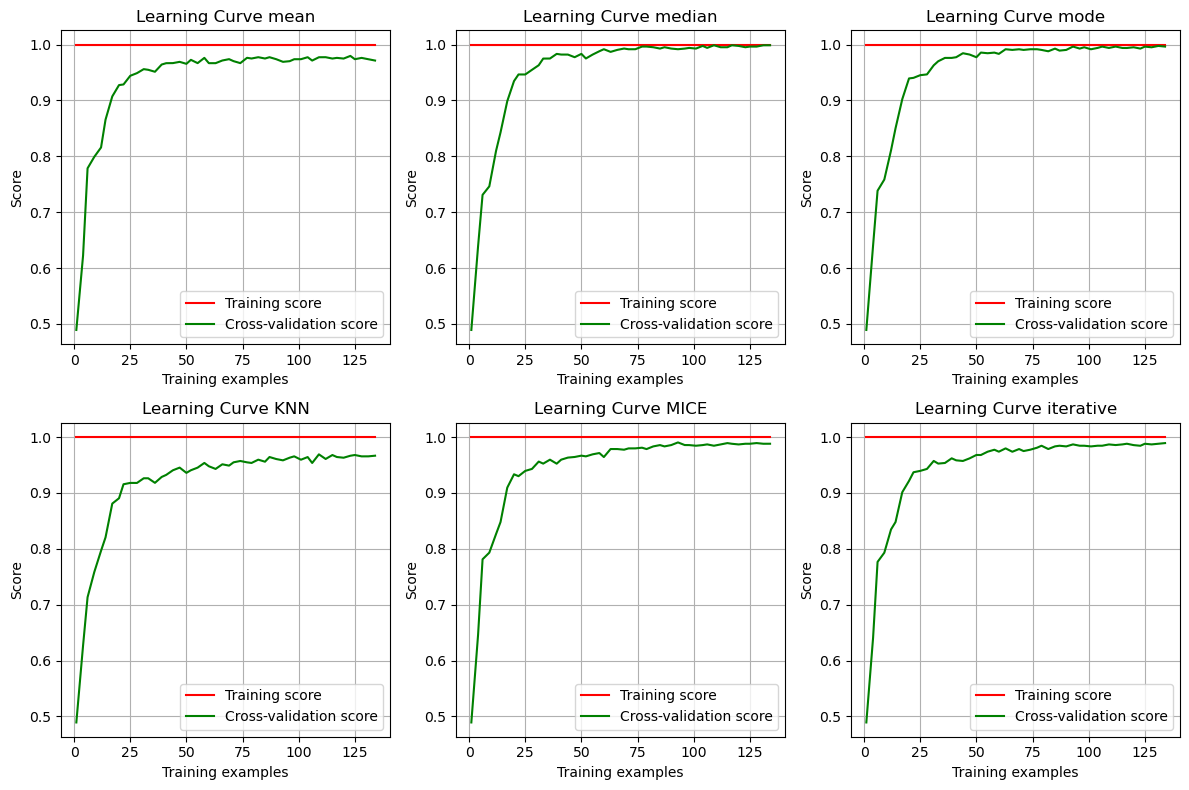

In [26]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

#### Mean feature importances across all folds

In [27]:
df_without_diabetes = pd.read_csv('processed/df_without_diabetes.csv')

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,11.3,38.0,6000.0,NaN,0.0,0.0,1.0,0.0,0.0,True
1,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,True
2,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,1.0,0.0,0.0,True
3,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,100.0,...,12.4,36.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,True
4,40.0,80.0,1.015,3.0,0.0,NaN,1.0,0.0,0.0,76.0,...,7.6,24.0,3800.0,2.8,1.0,0.0,1.0,0.0,1.0,True


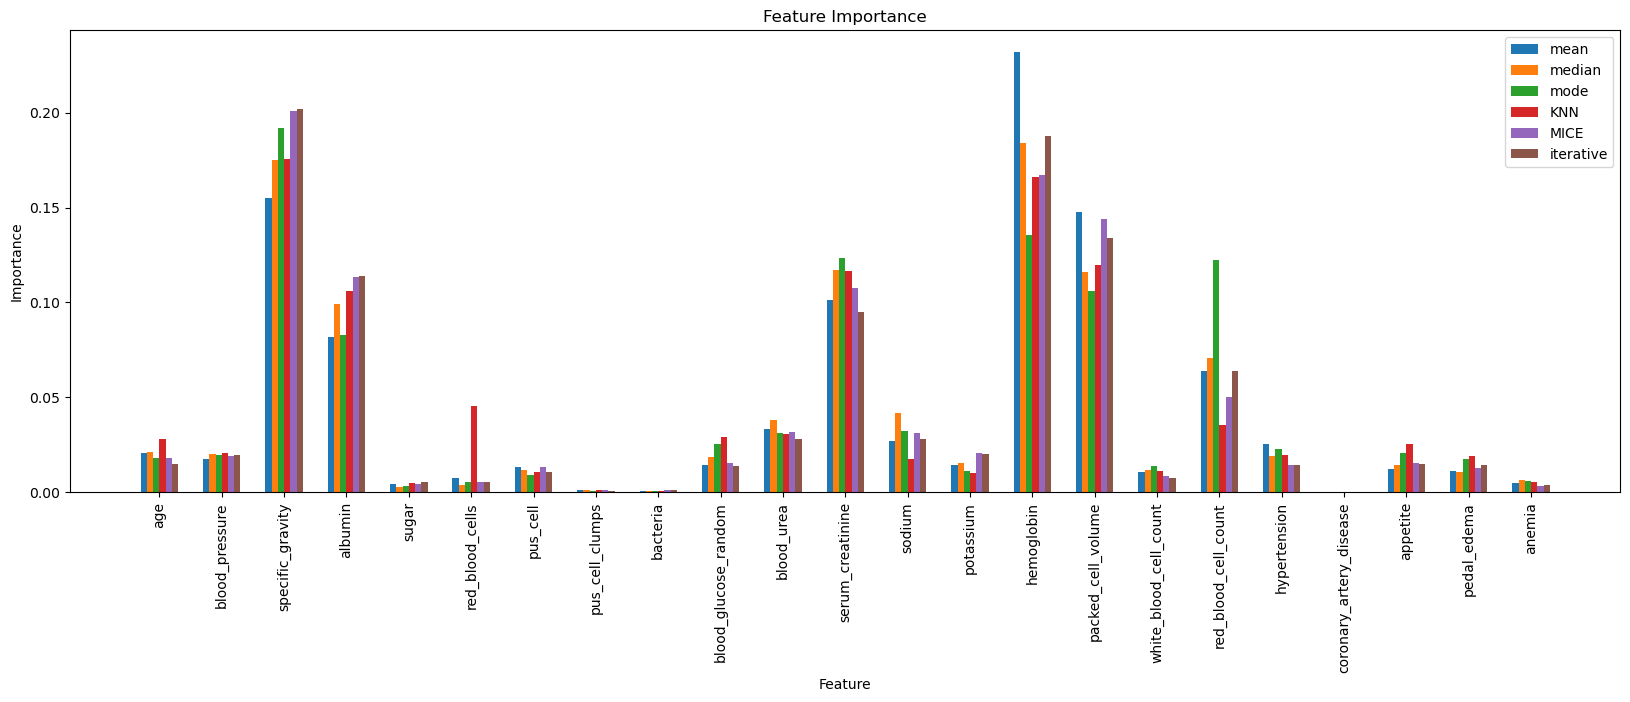

In [35]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
feature_importances = {}
for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        fi.append(model.feature_importances_)
    

    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_without_diabetes.drop(columns=['class']).columns, columns=['Importance'])
plot_feature_importances(feature_importances)
